# Stance Detection for the Fake News Challenge

## Identifying Textual Relationships with Deep Neural Nets

### Check the problem context [here](https://drive.google.com/open?id=1KfWaZyQdGBw8AUTacJ2yY86Yxgw2Xwq0).

### Download files required for the project from [here](https://drive.google.com/open?id=10yf39ifEwVihw4xeJJR60oeFBY30Y5J8).

## Step1: Load the given dataset  

1. Mount the google drive

2. Import Glove embeddings

3. Import the test and train datasets

### Mount the google drive to access required project files

Run the below commands

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


#### Path for Project files on google drive

**Note:** You need to change this path according where you have kept the files in google drive. 

In [0]:
project_path = "/content/drive/My Drive/Fake_News_project/"

### Loading the Glove Embeddings

In [0]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/Fake_News_Project/glove.6B.zip', 'r') as z:
  z.extractall()

# Load the dataset [5 Marks]

1. Using [read_csv()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) in pandas load the given train datasets files **`train_bodies.csv`** and **`train_stances.csv`**

2. Using [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) command in pandas merge the two datasets based on the Body ID. 

Note: Save the final merged dataset in a dataframe with name **`dataset`**.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:

bodies_df=pd.read_csv("/content/drive/My Drive/Fake_News_Project/train_bodies.csv")
stances_df=pd.read_csv("/content/drive/My Drive/Fake_News_Project/train_stances.csv")

In [0]:
stances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 3 columns):
Headline    49972 non-null object
Body ID     49972 non-null int64
Stance      49972 non-null object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [0]:
dataset = pd.merge(bodies_df,stances_df, on='Body ID')


<h2> Check1:</h2>
  
<h3> You should see the below output if you run `dataset.head()` command as given below </h3>

In [0]:
dataset.head()

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,unrelated


In [0]:
dataset=dataset[0:5000]

In [0]:
len(dataset)

5000

## Step2: Data Pre-processing and setting some hyper parameters needed for model


#### Run the code given below to set the required parameters.

1. `MAX_SENTS` = Maximum no.of sentences to consider in an article.

2. `MAX_SENT_LENGTH` = Maximum no.of words to consider in a sentence.

3. `MAX_NB_WORDS` = Maximum no.of words in the total vocabualry.

4. `MAX_SENTS_HEADING` = Maximum no.of sentences to consider in a heading of an article.

In [0]:
MAX_NB_WORDS = 20000
MAX_SENTS = 20
MAX_SENTS_HEADING = 1
MAX_SENT_LENGTH = 20
VALIDATION_SPLIT = 0.2

### Download the `Punkt` from nltk using the commands given below. This is for sentence tokenization.

For more info on how to use it, read [this](https://stackoverflow.com/questions/35275001/use-of-punktsentencetokenizer-in-nltk).



In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Tokenizing the text and loading the pre-trained Glove word embeddings for each token  [5 marks] 

Keras provides [Tokenizer API](https://keras.io/preprocessing/text/) for preparing text. Read it before going any further.

#### Import the Tokenizer from keras preprocessing text

In [0]:
import tensorflow as tf

from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


#### Initialize the Tokenizer class with maximum vocabulary count as `MAX_NB_WORDS` initialized at the start of step2. 

In [0]:
t=Tokenizer(num_words=MAX_NB_WORDS)
t1=Tokenizer(num_words=MAX_NB_WORDS)

#### Now, using fit_on_texts() from Tokenizer class, lets encode the data 

Note: We need to fit articleBody and Headline also to cover all the words.

In [0]:
t.fit_on_texts(dataset['articleBody'])
t1.fit_on_texts(dataset['Headline'])



In [0]:
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
print(t1.word_counts)
print(t1.document_count)
print(t1.word_index)
print(t1.word_docs)

OrderedDict([('a', 47065), ('small', 484), ('meteorite', 688), ('crashed', 53), ('into', 2743), ('wooded', 133), ('area', 693), ('in', 41568), ("nicaragua's", 77), ('capital', 782), ('of', 45764), ('managua', 170), ('overnight', 190), ('the', 115219), ('government', 3499), ('said', 13884), ('sunday', 788), ('residents', 488), ('reported', 1932), ('hearing', 260), ('mysterious', 63), ('boom', 102), ('that', 24616), ('left', 847), ('16', 485), ('foot', 205), ('deep', 292), ('crater', 453), ('near', 1644), ("city's", 340), ('airport', 447), ('associated', 666), ('press', 1484), ('reports', 2086), ('spokeswoman', 225), ('rosario', 103), ('murillo', 139), ('committee', 302), ('formed', 81), ('by', 9886), ('to', 46988), ('study', 353), ('event', 476), ('determined', 278), ('it', 11136), ('was', 18082), ('relatively', 143), ('appears', 611), ('have', 11270), ('come', 862), ('off', 1802), ('an', 9661), ('asteroid', 486), ('passing', 140), ('close', 900), ('earth', 502), ('house', 820), ('sized

In [0]:
type(t.word_index)

dict

In [0]:
len(t.word_index)

9803

In [0]:
df=pd.DataFrame({"Word_index":t.word_index})
df.reset_index(inplace = True) 

In [0]:
df["index"].nunique()

9803

#### fit_on_texts() gives the following attributes in the output as given [here](https://faroit.github.io/keras-docs/1.2.2/preprocessing/text/).

* **word_counts:** dictionary mapping words (str) to the number of times they appeared on during fit. Only set after fit_on_texts was called.

* **word_docs:** dictionary mapping words (str) to the number of documents/texts they appeared on during fit. Only set after fit_on_texts was called.

* **word_index:** dictionary mapping words (str) to their rank/index (int). Only set after fit_on_texts was called.

* **document_count:** int. Number of documents (texts/sequences) the tokenizer was trained on. Only set after fit_on_texts or fit_on_sequences was called.



### Now, tokenize the sentences using nltk sent_tokenize() and encode the senteces with the ids we got form the above `t.word_index`

Initialise 2 lists with names `texts` and `articles`.

```
texts = [] to store text of article as it is.

articles = [] split the above text into a list of sentences.
```

In [0]:
from nltk.tokenize import sent_tokenize
texts=[]
articles=[]
  
for i,v in enumerate(dataset['articleBody']):
  value_text=v
  texts.append(value_text)
  articles.append(sent_tokenize(value_text))

## Check 2:

first element of texts and articles should be as given below. 

In [0]:
texts[0]

'A small meteorite crashed into a wooded area in Nicaragua\'s capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city\'s airport, the Associated Press reports. \n\nGovernment spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a "relatively small" meteorite that "appears to have come off an asteroid that was passing close to Earth." House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports. \nMurillo said Nicaragua will ask international experts to help local scientists in understanding what happened.\n\nThe crater left by the meteorite had a radius of 39 feet and a depth of 16 feet,  said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee. He said it is still not clear if the meteorite disintegrated or was buried.\n\nHumbe

In [0]:
articles[0]

["A small meteorite crashed into a wooded area in Nicaragua's capital of Managua overnight, the government said Sunday.",
 "Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city's airport, the Associated Press reports.",
 'Government spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a "relatively small" meteorite that "appears to have come off an asteroid that was passing close to Earth."',
 'House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports.',
 'Murillo said Nicaragua will ask international experts to help local scientists in understanding what happened.',
 'The crater left by the meteorite had a radius of 39 feet and a depth of 16 feet,  said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee.',
 'He said it is still not clear if the meteorite disintegrated or was bu

# Now iterate through each article and each sentence to encode the words into ids using t.word_index  [5 marks] 

Here, to get words from sentence you can use `text_to_word_sequence` from keras preprocessing text.

1. Import text_to_word_sequence

2. Initialize a variable of shape (no.of articles, MAX_SENTS, MAX_SENT_LENGTH) with name `data` with zeros first (you can use numpy [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) to initialize with all zeros)and then update it while iterating through the words and sentences in each article.

In [0]:
from keras.preprocessing.text import text_to_word_sequence
data = np.zeros((len(dataset['articleBody']), MAX_SENTS, MAX_SENT_LENGTH),dtype=int)

In [0]:
count=0
  
for i,docs in enumerate(articles):
  sent_count=0
  for j,sentences in enumerate(docs):
    if sent_count<20:
      sentence=articles[i][j]
      words=text_to_word_sequence(sentence)
      word_count=0
      for k,w in enumerate(words):
        if word_count<20:
          word_t=w
          for ind,val in enumerate(t.word_index):
            w=val
            k1=ind
            if val==word_t:
              #print(word_t,k1)
              data[i][j][k]=k1
         
          #print(word_t)
        word_count=word_count+1
        
    sent_count=sent_count+1
      
    
  
 
      
 

In [0]:
data[0,:,]

array([[   1,  564,  374, 4094,   76,    1, 2170,  371,    4, 3288,  321,
           3, 1724, 1535,    0,   57,   11,  319,    0,    0],
       [ 554,  109, 1161,    1, 3638, 2600,    6,  281,    1,  562, 1421,
        1022,  614,  136,    0,  866,  630,    0,  396,  156],
       [  57, 1309, 2590, 2109,   11,    1,  982, 3126,   19,    0,   57,
           2,  827,    0,  575, 1091,   16,    8,    1, 2035],
       [ 298, 4190,  560,  193, 2638,   40, 4997, 1499, 2036,    4, 5114,
        5115,    0,  538,   27,  819, 5038,   73,  103,    0],
       [2109,   11, 2146,   34, 1545,  345, 1032,    2,  368,  338, 1422,
           4, 1756,  117, 1448,    0,    0,    0,    0,    0],
       [   0,  614,  281,   19,    0,  374,   30,    1, 5116,    3, 1880,
        2036,    5,    1, 5117,    3,  562, 2036,   11, 2921],
       [  12,   11,   16,    7,  142,   21,  662,   80,    0,  374, 3099,
          47,    8, 3701,    0,    0,    0,    0,    0,    0],
       [2921, 5118,    3,    0, 5119,  57

In [0]:
len(data)

5000

### Check 3:

Accessing first element in data should give something like given below.

In [0]:
data[0, :, :]

array([[   1,  564,  374, 4094,   76,    1, 2170,  371,    4, 3288,  321,
           3, 1724, 1535,    0,   57,   11,  319,    0,    0],
       [ 554,  109, 1161,    1, 3638, 2600,    6,  281,    1,  562, 1421,
        1022,  614,  136,    0,  866,  630,    0,  396,  156],
       [  57, 1309, 2590, 2109,   11,    1,  982, 3126,   19,    0,   57,
           2,  827,    0,  575, 1091,   16,    8,    1, 2035],
       [ 298, 4190,  560,  193, 2638,   40, 4997, 1499, 2036,    4, 5114,
        5115,    0,  538,   27,  819, 5038,   73,  103,    0],
       [2109,   11, 2146,   34, 1545,  345, 1032,    2,  368,  338, 1422,
           4, 1756,  117, 1448,    0,    0,    0,    0,    0],
       [   0,  614,  281,   19,    0,  374,   30,    1, 5116,    3, 1880,
        2036,    5,    1, 5117,    3,  562, 2036,   11, 2921],
       [  12,   11,   16,    7,  142,   21,  662,   80,    0,  374, 3099,
          47,    8, 3701,    0,    0,    0,    0,    0,    0],
       [2921, 5118,    3,    0, 5119,  57

# Repeat the same process for the `Headings` as well. Use variables with names `texts_heading` and `articles_heading` accordingly. [5 marks] 

In [0]:
from nltk.tokenize import sent_tokenize
texts_heading=[]
articles_heading=[]
  
for i,v in enumerate(dataset['Headline']):
  value_text=v
  texts_heading.append(value_text)
  articles_heading.append(sent_tokenize(value_text))

In [0]:
from keras.preprocessing.text import text_to_word_sequence
data_head=  np.zeros((len(dataset['Headline']), MAX_SENTS, MAX_SENT_LENGTH),dtype=int)


for i,docs in enumerate(texts_heading):
  sent_count=0
  for j,sentences in enumerate(articles_heading):
    if sent_count<20:
      sentence=texts[i][j]
      words=text_to_word_sequence(sentence)
      word_count=0
      for k,w in enumerate(words):
        if word_count<20:
          word_t=w
          for ind,val in enumerate(t.word_index):
            w=val
            k1=ind
            if val==word_t:
              #print(word_t,k1)
              data_head[i][j][k]=k1
         
          #print(word_t)
        word_count=word_count+1
        
    sent_count=sent_count+1
          

In [0]:
data_head.shape

(5000, 20, 20)

### Now the features are ready, lets make the labels ready for the model to process.

### Convert labels into one-hot vectors

You can use [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) in pandas to create one-hot vectors.

In [0]:
dataset["Stance"].unique()

array(['unrelated', 'agree', 'discuss', 'disagree'], dtype=object)

### Check 4:

The shape of data and labels shoould match the given below numbers.

In [0]:
labels=pd.get_dummies(dataset['Stance'])

In [0]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (5000, 20, 20)
Shape of label tensor: (5000, 4)


### Shuffle the data

In [0]:
## get numbers upto no.of articles
indices = np.arange(data.shape[0])
## shuffle the numbers
np.random.shuffle(indices)

In [0]:
type(labels)

pandas.core.frame.DataFrame

In [0]:
## shuffle the data
data = data[indices]
data_head = data_head[indices]
## shuffle the labels according to data
labels = labels.iloc[indices]

In [0]:
data[0]

array([[   0, 1227,   57,   17, 1373,    1,  806, 3979,   31,  170,    9,
         355,    4,  759,    5,  372,  411,  125,    2,  139],
       [3980, 2169,  322, 1809, 3981, 2483,   11,    1,  202,    3, 1568,
         540,   30,   25, 3896,   98, 3982,  780,  624,  483],
       [ 533,  483,   30,   25,  194,  771,  118, 1236,   26,   30, 1911,
           2,  692, 3570,    0,  322,   11,    0,    0,    0],
       [3983,  129,  823,    7,    1, 3984, 1345,    4,   57,  873, 1081,
           4,  752,    0,    0,    0,    0,    0,    0,    0],
       [ 533, 2483,   11,    4,    1,  201,    6,  533,  483, 1233,    0,
         694,  237,  872,  424,    4, 3875,    0,    0,    0],
       [  12,   30, 3985,    2,    0, 3806,    3,  840,  780,   19,  759,
          69,   12,  170,    9,  355,    0,    0,    0,    0],
       [  22, 1567,    8,  429,   60,    4, 1236,   26, 3876, 2331,    2,
        2484,   54,   35,   21, 1464,  337, 2774,    0,    0],
       [  16,  188,    1,  474,  635,  12

converting the size of X  shape into 400 numbers of single vector from 20X20 vectors

In [0]:
from itertools import chain
data_r=[]
data_head_r=[]

for i,v in enumerate(data):
  
  a=list(chain(*v))
  data_r.append(a)

for i,v in enumerate(data_head):
  
  a=list(chain(*v))
  data_head_r.append(a)

### Split into train and validation sets. Split the train set 80:20 ratio to get the train and validation sets.


Use the variable names as given below:

x_train, x_val - for body of articles.

x-heading_train, x_heading_val - for heading of articles.

y_train - for training labels.

y_val - for validation labels.



In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, X_heading_train,X_heading_val,y_train, y_val = train_test_split(np.array(data_r),np.array(data_head_r), labels, test_size=0.2, random_state=42)

### Check 5:

The shape of x_train, x_val, y_train and y_val should match the below numbers.

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_heading_train.shape)
print(X_heading_val.shape)
print(X_val.shape)
print(y_val.shape)

(4000, 400)
(4000, 4)
(4000, 400)
(1000, 400)
(1000, 400)
(1000, 4)


### Create embedding matrix with the glove embeddings


Run the below code to create embedding_matrix which has all the words and their glove embedding if present in glove word list.

In [0]:
# load the whole embedding into memory
vocab_size=MAX_NB_WORDS
embeddings_index = dict()
f = open('./glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

# create a weight matrix for words in training docs
#embedding_matrix = np.zeros((vocab_size, 100))
embedding_matrix = np.zeros((len(t.word_index) + 1, 100))


for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


# Try the sequential model approach and report the accuracy score. [10 marks]  

### Import layers from Keras to build the model

In [0]:
from keras.layers import Embedding

embedding_layer = Embedding(len(t.word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=400,
                            trainable=False)

### Model

In [0]:
from keras.models import Model, Input
import keras
from keras.applications.densenet import DenseNet121
from keras.layers import Input
from keras.models import Model,Sequential
from keras.layers import Dense,Conv1D,MaxPool1D,BatchNormalization,MaxPooling1D,SpatialDropout1D
from keras.optimizers import Adam,SGD
from keras.layers import LSTM, Embedding, Dense
from keras.models import Model, Input
from keras.layers.merge import add
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda,Flatten

In [0]:
len(X_train[0])

400

In [0]:
MAX_SEQUENCE_LENGTH=400
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = LSTM(units=50, return_sequences=True,
                           recurrent_dropout=0.2, dropout=0.2)(embedded_sequences)
x = LSTM(units=50, return_sequences=True,
                           recurrent_dropout=0.2, dropout=0.2)(x)
x=Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

preds = Dense(4, activation='softmax')(x)
model_glove = Model(sequence_input, preds)


### Compile and fit the model

In [0]:
model_glove.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 400)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 400, 100)          980400    
_________________________________________________________________
lstm_3 (LSTM)                (None, 400, 50)           30200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 400, 50)           20200     
_________________________________________________________________
flatten_2 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2560128   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
__________

In [0]:
model_glove.compile(optimizer="adam", loss="categorical_crossentropy",metrics=['acc'])

In [0]:

model_glove.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, verbose=1)

Train on 4000 samples, validate on 1000 samples
Epoch 1/3
4000/4000 [==============================] - 223s 56ms/step - loss: 0.3635 - acc: 0.9293 - val_loss: 0.2882 - val_acc: 0.9540
Epoch 2/3
4000/4000 [==============================] - 221s 55ms/step - loss: 0.3061 - acc: 0.9308 - val_loss: 0.2520 - val_acc: 0.9540
Epoch 3/3
4000/4000 [==============================] - 218s 55ms/step - loss: 0.2833 - acc: 0.9305 - val_loss: 0.2017 - val_acc: 0.9540


In [0]:

history=model_glove.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=1)

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 222s 56ms/step - loss: 0.2728 - acc: 0.9313 - val_loss: 0.2181 - val_acc: 0.9550
Epoch 2/10
4000/4000 [==============================] - 221s 55ms/step - loss: 0.2553 - acc: 0.9340 - val_loss: 0.1935 - val_acc: 0.9540
Epoch 3/10
4000/4000 [==============================] - 222s 56ms/step - loss: 0.2500 - acc: 0.9350 - val_loss: 0.1998 - val_acc: 0.9590
Epoch 4/10
4000/4000 [==============================] - 221s 55ms/step - loss: 0.2434 - acc: 0.9380 - val_loss: 0.2180 - val_acc: 0.9580
Epoch 5/10
4000/4000 [==============================] - 219s 55ms/step - loss: 0.2355 - acc: 0.9423 - val_loss: 0.1850 - val_acc: 0.9600
Epoch 6/10
4000/4000 [==============================] - 220s 55ms/step - loss: 0.2239 - acc: 0.9437 - val_loss: 0.1851 - val_acc: 0.9600
Epoch 7/10
4000/4000 [==============================] - 220s 55ms/step - loss: 0.2145 - acc: 0.9453 - val_loss: 0.1827 - val_acc: 

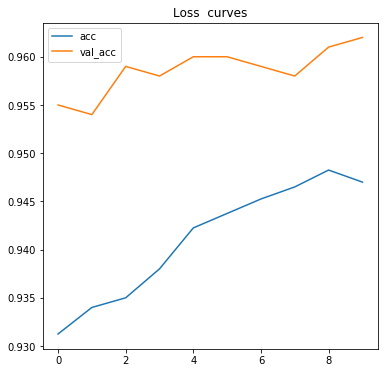

In [0]:
import matplotlib.pyplot as plt
hist = pd.DataFrame(history.history)
plt.figure(figsize=(6,6))
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.title("Loss  curves")
plt.legend()
plt.show()

In [0]:
#Saving the model
from keras.models import load_model

model_glove.save('/content/drive/My Drive/Fake_News_Project/model_glove_5000.h5')  # creates a HDF5 file 'my_model.h5'

## Build the same model with attention layers included for better performance (Optional)

## Fit the model and report the accuracy score for the model with attention layer (Optional)